In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_indicies=['TSLA','AMZN','MSFT','AAPL','GOOGL','WMT','JPM','JNJ','INTC']

In [3]:
for symbol in stock_indicies:
    stock_data=yf.download(symbol, start='2010-01-01', end='2023-06-15')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
for symbol in stock_indicies:
    # Moving average calculation
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

In [5]:
for symbol in stock_indicies:
    # Pattern detection
    stock_data['DescendingTriangle'] = (
            (stock_data['High'].rolling(window=30).max() == stock_data['High']) &
            (stock_data['Low'].rolling(window=30).min().shift(1) == stock_data['Low'])
    ).astype(int)

    stock_data['BullFlag'] = (
            (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    ).astype(int)

    stock_data['InverseCupHandle'] = (
            (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) &
            (stock_data['SMA_50'] < stock_data['SMA_200'])
    ).astype(int)

    stock_data['RoundingBottom'] = (
            (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) &
            (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    ).astype(int)

    stock_data['InverseHeadShoulder'] = (
            (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) &
            (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    ).astype(int)

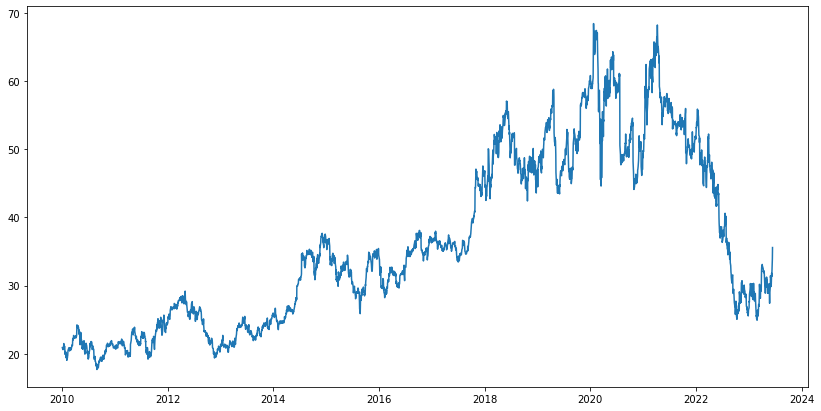

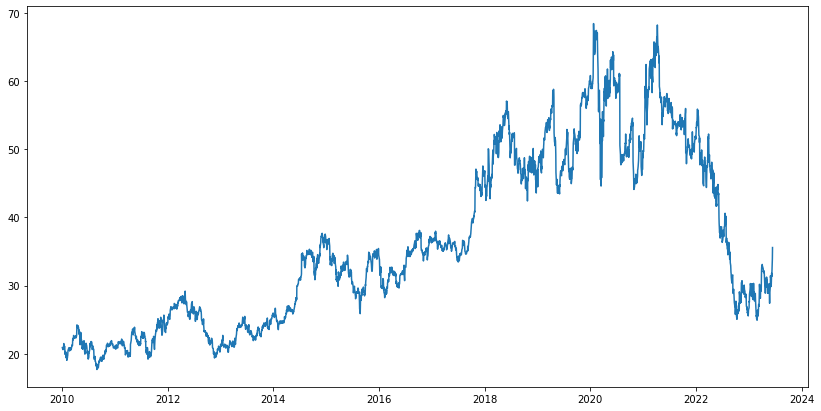

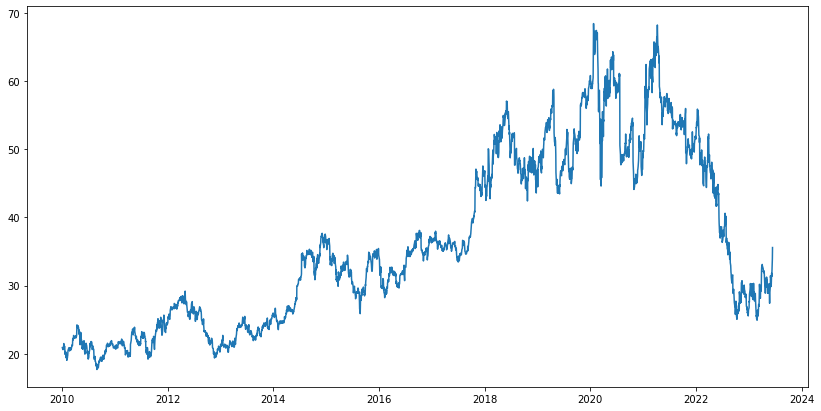

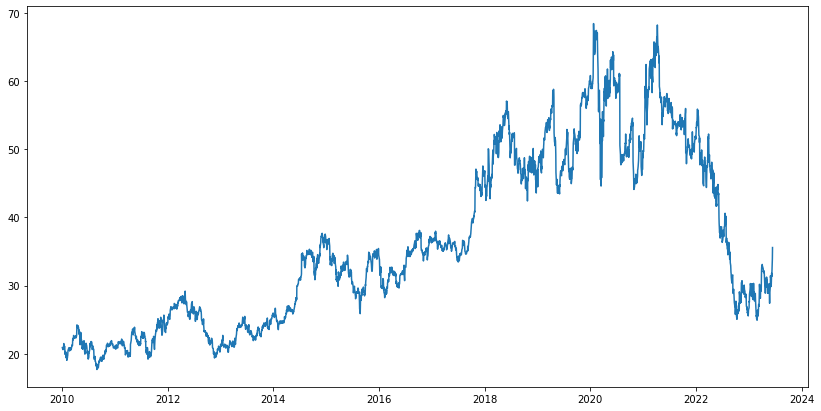

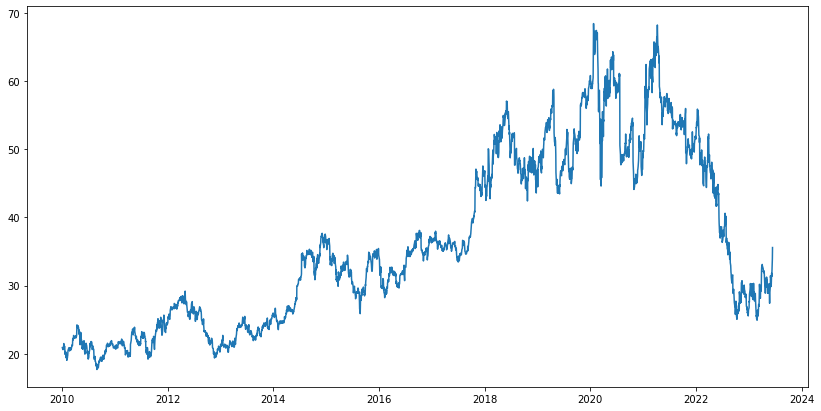

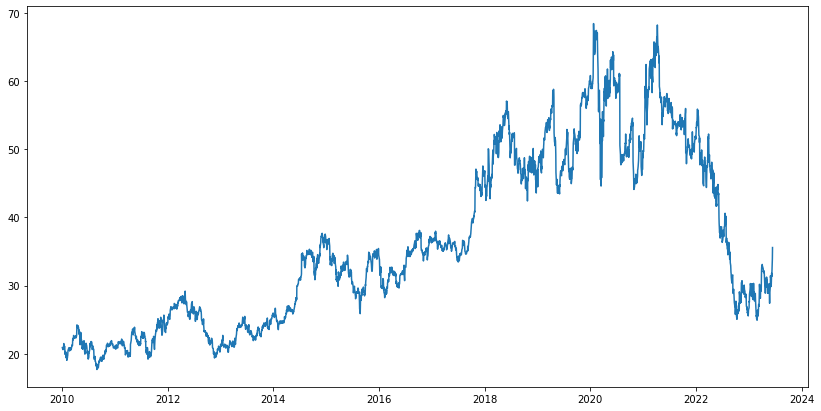

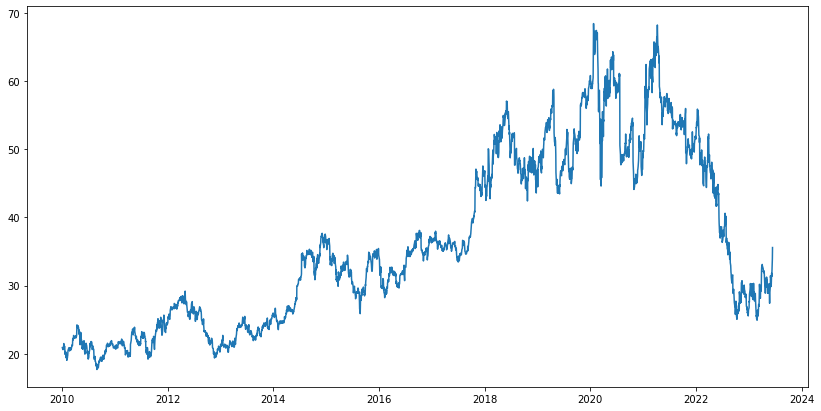

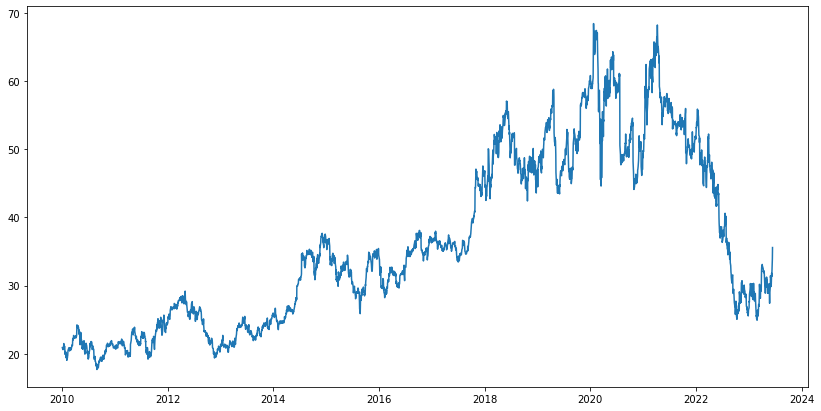

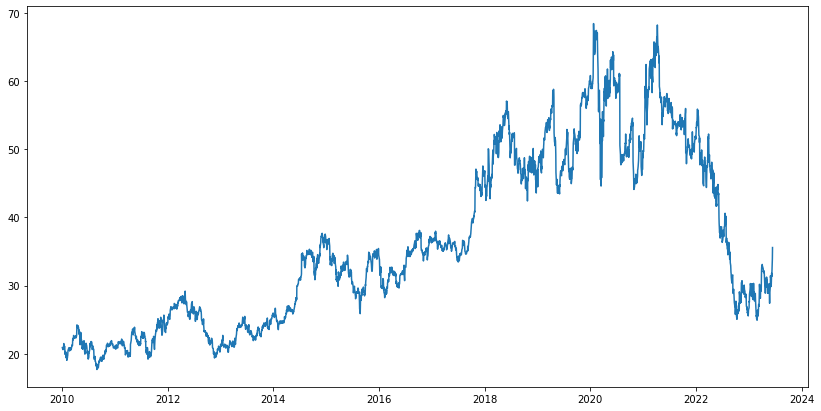

In [6]:
for symbol in stock_indicies:
    # Stock chart
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, stock_data['Close'], label='CLOSE')

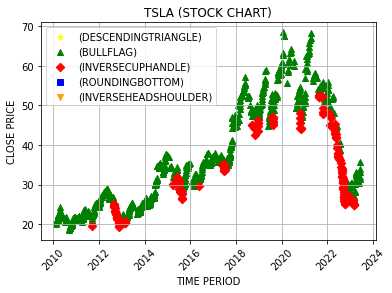

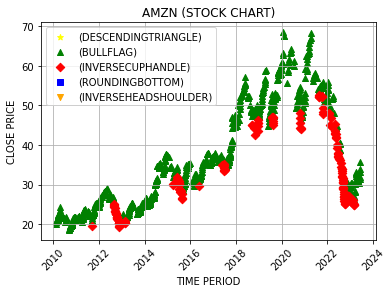

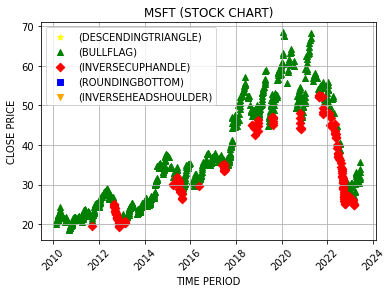

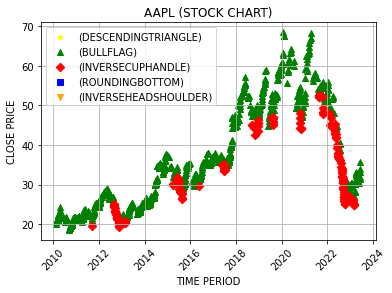

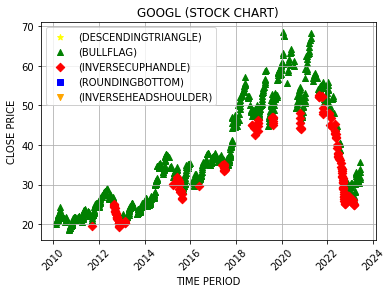

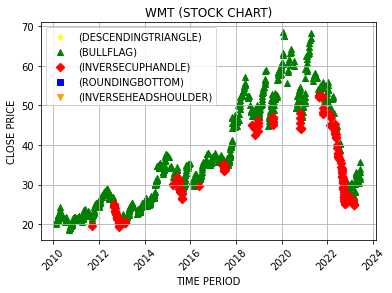

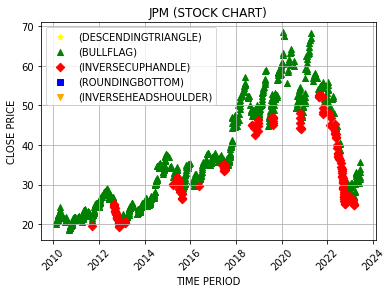

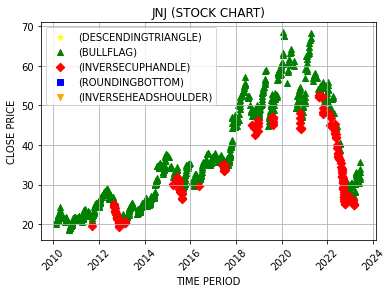

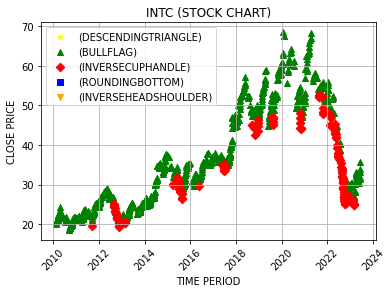

In [7]:
for symbol in stock_indicies:
    # Pattern markers
    patterns = ['DescendingTriangle', 'BullFlag', 'InverseCupHandle', 'RoundingBottom', 'InverseHeadShoulder']
    markers = ['*', '^', 'D', 's', 'v']
    colors = ['yellow', 'green', 'red', 'blue', 'orange']

    for pattern, marker, color in zip(patterns, markers, colors):
        plt.scatter(stock_data[stock_data[pattern] == 1].index, stock_data[stock_data[pattern] == 1]['Close'],
                    marker=marker, color=color, label=f'({pattern.upper()})')

    plt.title(symbol + ' (STOCK CHART)')
    plt.xlabel('TIME PERIOD')
    plt.ylabel('CLOSE PRICE')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()